# Maximizing Revenue of an Online Retail Business
### Thomson Sampling

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import random

# Setting the parameters
N = 20000 # Customers
D = 9     # Strategies

# Creating the simulation
# conversion_rates = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
# conversion_rates = [0.05,0.13,0.09,0.16,0.11,0.04,0.20,0.08,0.01]
conversion_rates = [0.01,0.13,0.09,0.26,0.35,0.14,0.20,0.08,0.05]

"""
Just for convenience, we will be pre-computing the results of each of our "simulated" experiments
according to our conversion_rates (unknown for the machine)
"""
X = np.array(np.zeros([N,D])) # N clients tested with each of the D strategies
for i in range(N):
    for j in range(D):
        if np.random.rand() <= conversion_rates[j]:
            X[i,j] = 1# Implementing a Random Strategy and Thompson Sampling with Regret Curve
"""
We will loop over the rows (or rounds) of this rewards matrix, and at each round we will get two
separate strategy selections: one from the Random Selection algorithm, and one from Thompson Sampling.
We keep track of the strategies selected by each of these two algorithms, and we compute the total reward
accumulated over the rounds by each of them. 
"""
strategies_selected_rs = [] # random
strategies_selected_ts = [] # Thomson
total_reward_rs = 0
total_reward_ts = 0
total_reward_bs = 0 # theoretical best strategy
numbers_of_rewards_1 = [0] * D # auxiliary for Thomson strategy
numbers_of_rewards_0 = [0] * D # auxiliary for Thomson strategy
rewards_strategies   = [0] * D # auxiliary for "best" strategy
regret_rs = []
regret_ts = []

for n in range(0, N):
    # Random Strategy
    strategy_rs = random.randrange(D)
    strategies_selected_rs.append(strategy_rs)
    reward_rs = X[n, strategy_rs] # our pre-computed result...
    total_reward_rs = total_reward_rs + reward_rs
    
    # Thompson Sampling
    strategy_ts = 0
    max_random = 0
    for i in range(0, D):
        random_beta = random.betavariate(numbers_of_rewards_1[i] + 1, numbers_of_rewards_0[i] + 1)
        if random_beta > max_random:
            max_random = random_beta
            strategy_ts = i # Thomson selection
    
    reward_ts = X[n, strategy_ts] # our pre-computed result...
    
    if reward_ts == 1:
        numbers_of_rewards_1[strategy_ts] = numbers_of_rewards_1[strategy_ts] + 1
    else:
        numbers_of_rewards_0[strategy_ts] = numbers_of_rewards_0[strategy_ts] + 1
        
    strategies_selected_ts.append(strategy_ts)
    total_reward_ts = total_reward_ts + reward_ts
    
    # Best Strategy (unkown in the "real" world)
    for i in range(0, D):
        rewards_strategies[i] = rewards_strategies[i] + X[n, i]  # our pre-computed result... D times
    total_reward_bs = max(rewards_strategies)
    
    # Regret
    regret_rs.append(total_reward_bs - total_reward_rs)
    regret_ts.append(total_reward_bs - total_reward_ts)

print(total_reward_rs)
print(total_reward_ts)
print(total_reward_bs)

# Computing the Absolute and Relative Return
absolute_return = total_reward_ts - total_reward_rs
relative_return = (total_reward_ts - total_reward_rs) / total_reward_rs * 100
print("Absolute Return: {:.0f} $".format(absolute_return))
print("Relative Return: {:.0f} %".format(relative_return))

2918.0
6918.0
7044.0
Absolute Return: 4000 $
Relative Return: 137 %


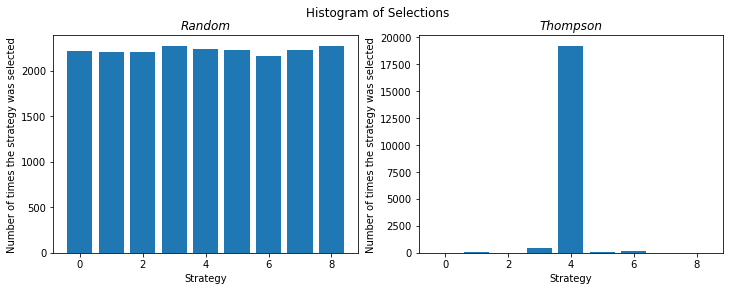

In [2]:
# Count the Number of Occurrences in a Python list using Counter (preferable to histogram plot)
from collections import Counter
fig, (axr, axt) = plt.subplots(1, 2, sharex=True, sharey=False, figsize=(12,4))
# Plotting the Histogram of Selections
fig.suptitle('Histogram of Selections')
axr.set_title('Random', fontstyle='italic')
axt.set_title('Thompson', fontstyle='italic')
# axt.set_title('Thompson', fontfamily='serif', loc='left', fontsize='medium')
# fig.text(0.5, 0.04, 'common X', ha='center')
# fig.text(0.04, 0.5, 'common Y', va='center', rotation='vertical')
axr.set_xlabel('Strategy')
axr.set_ylabel('Number of times the strategy was selected')
plt.xlabel('Strategy')
plt.ylabel('Number of times the strategy was selected')
# axr.hist(strategies_selected_rs,bins=D,align='mid')
# axt.hist(strategies_selected_ts,bins=D,align='mid')
counts = Counter(strategies_selected_rs)
counts = [counts[k] for k in range(D)]
axr.bar(range(D), counts)
counts = Counter(strategies_selected_ts)
counts = [counts[k] for k in range(D)]
axt.bar(range(D), counts)
plt.show()

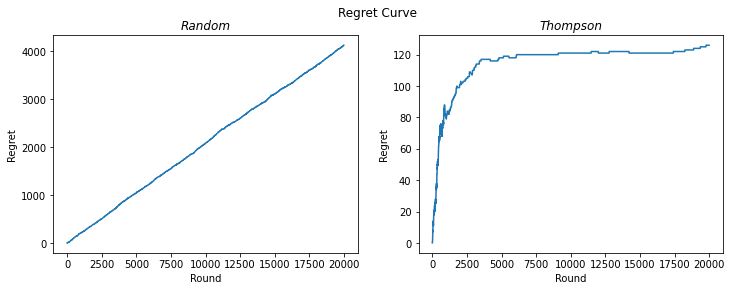

In [3]:
fig, (axr, axt) = plt.subplots(1, 2, sharex=True, sharey=False, figsize=(12,4))
# Plotting the Regret Curves
fig.suptitle('Regret Curve')
axr.set_title('Random', fontstyle='italic')
axt.set_title('Thompson', fontstyle='italic')
axr.set_xlabel('Round')
axr.set_ylabel('Regret')
plt.xlabel('Round')
plt.ylabel('Regret')
axr.plot(regret_rs)
axt.plot(regret_ts)
plt.show()